# Session Six 6 
# Programming with Python  MOD007891

# Understanding NumPy 2

## Session Outline



- Computation on Arrays: Broadcasting
- Comparisons, Masks, and Boolean Logic
- Fancy Indexing
- Sorting Arrays
- Structured Arrays


# Computation on Arrays: Broadcasting

We saw in the previous section how NumPy's universal functions can be used to **vectorize operations** and thereby remove **slow Python loops.**


Another means of vectorizing operations is to use NumPy's **broadcasting** functionality.

**What is Broadcasting?**


Broadcasting is simply a set of rules for applying ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

## Introducing Broadcasting

Recall that for arrays of the **same size,** binary ufuncs are performed on an element-by-element basis:

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

**Broadcasting** allows these types of binary operations to be performed on **arrays of different sizes**. For example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [3]:
a + 5

array([5, 6, 7])

We can think of this as an operation that **stretches or duplicates** the value ``5`` into the array ``[5, 5, 5]``, and adds the results.


The advantage of NumPy's broadcasting is that this duplication of values **does not actually take place**, but it is a useful mental model as we think about broadcasting.

We can similarly **extend this to arrays of higher dimension**. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [4]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
a

array([0, 1, 2])

In [6]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array ``a`` is **stretched**, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [7]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [10]:
 y=np.array([[0,1,2],
 [0,1,2],
 [0,1,2]
])

z =np.array([[0,0,0],[1,1,1],[2,2,2]])
y+z

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [8]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've **stretched *both*** ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure.

![Broadcasting Visual](Images/02.05-broadcasting.png)

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## Rules of Broadcasting

Broadcasting in NumPy follows a **strict set of rules** to determine the interaction between the two arrays:

**- Rule 1:** If the two arrays differ in their number of **dimensions,** the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.

**- Rule 2:** If the **shape** of the two arrays does not match in any dimension, the array with shape equal to **1** in that dimension is stretched to match the other shape.

**- Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [16]:
M = np.ones((2, 3))[:, np.newaxis]
a = np.arange(3)[:, np.newaxis]
M + a

array([[[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]],

       [[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]]])

In [11]:
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
a

array([0, 1, 2])

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [ ]:
M + a

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [13]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [15]:
a

array([[0],
       [1],
       [2]])

In [16]:
b

array([0, 1, 2])

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [17]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [18]:
M = np.ones((3, 2))
a = np.arange(3)
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [19]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [20]:
a

array([0, 1, 2])

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
M + a

Note the potential confusion here: you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with **ones** on the **right** rather than the **left.**

But this is not how the broadcasting rules work!


That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.


If right-side padding is what you'd like, you can do this explicitly by reshaping the array.

In [21]:
M = np.ones((3, 2))
a = np.arange(3)

In [22]:
a

array([0, 1, 2])

In [23]:
a.shape

(3,)

In [24]:
a[:, np.newaxis].shape


(3, 1)

In [ ]:
M

In [ ]:
M.shape

In [ ]:
M + a[:, np.newaxis]

Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.


For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [25]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

Broadcasting operations form the core of many examples we'll see throughout this module.
We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write **slow Python loops. **

Broadcasting extends this ability.

One commonly seen example is when **centering** an array of data.


Imagine you have an array of 10 observations, each of which consists of 3 values (features).


Using the standard convention, we'll store this in a $10 \times 3$ array:

In [26]:
X = np.random.random((10, 3))
X

array([[0.87195543, 0.07446242, 0.59297018],
       [0.67632822, 0.99955335, 0.75819272],
       [0.5220312 , 0.63289543, 0.82649214],
       [0.35341592, 0.47429983, 0.92582274],
       [0.80492351, 0.95015213, 0.6168458 ],
       [0.0705111 , 0.09980394, 0.71033593],
       [0.67957431, 0.12712007, 0.62039821],
       [0.04618955, 0.51656032, 0.21339949],
       [0.28212849, 0.95491145, 0.07691974],
       [0.5331042 , 0.47578894, 0.90362575]])

We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [27]:
Xmean = X.mean(0)
Xmean

array([0.48401619, 0.53055479, 0.62450027])

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [29]:
X_centered = X - Xmean
X_centered

array([[ 0.38793924, -0.45609237, -0.03153009],
       [ 0.19231203,  0.46899856,  0.13369245],
       [ 0.03801501,  0.10234064,  0.20199187],
       [-0.13060027, -0.05625496,  0.30132247],
       [ 0.32090732,  0.41959734, -0.00765447],
       [-0.41350509, -0.43075085,  0.08583566],
       [ 0.19555811, -0.40343472, -0.00410206],
       [-0.43782664, -0.01399447, -0.41110078],
       [-0.20188771,  0.42435666, -0.54758053],
       [ 0.049088  , -0.05476585,  0.27912549]])

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [30]:
X_centered.mean(0)

array([ 3.33066907e-17,  0.00000000e+00, -5.55111512e-17])

To within machine precision, the mean is now zero.

### Plotting a two-dimensional function
One place that broadcasting is very useful is in **displaying images** based on two-dimensional functions.


If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [31]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [32]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [33]:
x.shape

(50,)

In [34]:
y

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [35]:
z.shape

(50, 50)

We'll use Matplotlib to plot this two-dimensional array (these tools will be discussed in full details soon, No worries!!) 

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

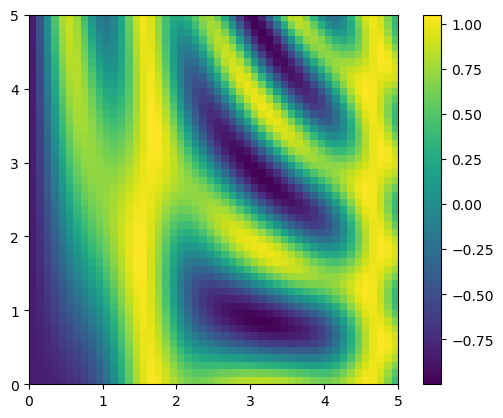

In [37]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

The result is a compelling visualization of the two-dimensional function.

# Comparisons, Masks, and Boolean Logic


This section covers the use of **Boolean Masks** to examine and manipulate values within NumPy arrays.


Masking comes up when you want to **extract, modify, count**, or otherwise manipulate values in an array based on some criterion. 

For example, you might wish to **count all values greater than a certain value,** or perhaps **remove all outliers that are above some threshold**.


In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## Example: Counting Rainy Days

Imagine you have a series of data that represents the **amount of precipitation each day** for a year in a given city.


For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas.

In [ ]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

In [ ]:
plt.hist(inches, 40);

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw **near zero** measured rainfall in 2014.


But this doesn't do a good job of conveying some information we'd like to see:

- How many rainy days were there in the year?

- What is the average precipitation on those rainy days?

- How many days were there with more than half an inch of rain?

### How can it be done?

One approach to this would be to answer these questions by hand: **loop through the data,** incrementing a counter each time we see values in some desired range.


For reasons discussed throughout this chapter, such an approach is **very inefficient,** both from the standpoint of time writing code and time computing the result.


We saw before  that **NumPy's ufuncs** can be used in place of loops to do fast element-wise arithmetic operations on arrays; in the same way, we can use other **ufuncs** to do **element-wise *comparisons*** over arrays, and we can then manipulate the results to answer the questions we have.


We'll leave the data aside for right now, and discuss some general tools in NumPy to use **masking** to quickly answer these types of questions.

## Comparison Operators as ufuncs

We introduced ufuncs, and focused in particular on arithmetic operators. We saw that using ``+``, ``-``, ``*``, ``/``, and others on arrays leads to element-wise operations.
NumPy also implements comparison operators such as ``<`` (less than) and ``>`` (greater than) as element-wise ufuncs.
The result of these comparison operators is always an array with a Boolean data type.
All six of the standard comparison operations are available:

In [ ]:
x < 3  # less than

In [ ]:
x > 3  # greater than

In [ ]:
x <= 3  # less than or equal

In [ ]:
x >= 3  # greater than or equal

In [ ]:
x != 3  # not equal

In [ ]:
x == 3  # equal

It is also possible to do an **element-wise comparison** of two arrays, and to include compound expressions:

In [ ]:
x = np.array([1, 2, 3, 4, 5])
False

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write ``x < 3``, internally NumPy uses ``np.less(x, 3)``.
    A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape.
Here is a two-dimensional example:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

In [ ]:
x < 6

In each case, the result is a **Boolean array,** and NumPy provides a number of straightforward patterns for working with these Boolean results.

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [ ]:
print(x)

### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [ ]:
x < 6

In [ ]:
# how many values less than 6?
np.count_nonzero(x < 6)

We see that there are eight array entries that are less than 6.


Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [ ]:
# Remember Flase is ZERO and True is ONE
np.sum(x < 6)

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [ ]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

This counts the number of values less than 6 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [ ]:
# are there any values greater than 8?
np.any(x > 8)

In [ ]:
# are there any values less than zero?
np.any(x < 0)

In [ ]:
# are all values less than 10?
np.all(x < 10)

In [ ]:
# are all values equal to 6?
np.all(x == 6)

In [ ]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

Here all the elements in the first and third rows are less than 8, while this is not the case for the second row.

Finally, a quick warning: as mentioned earlier, Python has built-in ``sum()``, ``any()``, and ``all()`` functions. These have a different syntax than the NumPy versions, and in particular will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using ``np.sum()``, ``np.any()``, and ``np.all()`` for these examples!

### Let's return to counting rainy days

We've already seen how we might count, say, all days with rain **less than four inches**, or all days with rain **greater than two inches**.

But what if we want to know about all days with rain less than four inches and greater than one inch?


This is accomplished through Python's **bitwise logic operators**, ``&``, ``|``, ``^``, and ``~``.


Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.


For example, we can address this sort of compound question as follows:

In [ ]:
np.sum((inches > 0.5) & (inches < 1))

So we see that there are 29 days with rainfall between 0.5 and 1.0 inches.

Note that the parentheses here are important–because of operator precedence rules, with parentheses removed this expression would be evaluated as follows, which results in an error:

``` python
inches > (0.5 & inches) < 1
```




The following table summarizes the **bitwise Boolean operators** and their equivalent **ufuncs:**

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Using these tools, we might start to answer the types of questions we have about our weather data.
Here are some examples of results we can compute when combining masking with aggregations:

In [ ]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

## Boolean Arrays as Masks

In the preceding section we looked at **aggregates** computed directly on Boolean arrays.


A more powerful pattern is to use **Boolean arrays as masks**, to select particular **subsets** of the data themselves.


Returning to our ``x`` array from before, suppose we want an array of all values in the array that are less than, say, 5:

In [33]:
x = np.random.randint(10, size=(3, 4))
print(x)
x[x < 5]

[[7 6 4 9]
 [8 7 3 4]
 [5 5 1 1]]


array([4, 3, 4, 1, 1])

In [37]:
x[x > 5]

array([7, 6, 9, 8, 7])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [ ]:
x < 5

Now to **select** these values from the array, we can simply **index** on this Boolean array; this is known as a **masking** operation:

What is returned is a **one-dimensional array** filled with all the values that **meet this condition;** in other words, all the values in positions at which the mask array is ``True``.


We are then free to operate on these values as we wish.
For example, we can compute some relevant statistics on our Seattle rain data:

In [ ]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

By combining Boolean operations, masking operations, and aggregates, we can very quickly answer these sorts of questions for our dataset.

## Using the Keywords and / or Versus the Operators & / |

One common point of confusion is the difference between the keywords ``and`` and ``or`` on one hand, and the operators ``&`` and ``|`` on the other hand.
When would you use one versus the other?

The difference is this: ``and`` and ``or`` gauge the truth or falsehood of **entire object**, while ``&`` and ``|`` refer to **bits within each object**.

When you use ``and`` or ``or``, it's equivalent to asking Python to treat the object as a single Boolean entity.


In Python, all **nonzero** integers will evaluate as True. Thus:

In [38]:
bool(42), bool(0)

(True, False)

In [43]:
bin(42bin0)

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [ ]:
bool(42 or 0)

When you use ``&`` and ``|`` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [ ]:
bin(42)

In [ ]:
bin(59)

In [44]:
bin(42 & 0)

'0b0'

In [ ]:
bin(42 | 59)

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where ``1 = True`` and ``0 = False``, and the result of ``&`` and ``|`` operates similarly to above:

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

Using ``or`` on these arrays will try to evaluate the truth or falsehood of the entire array object, which is not a well-defined value:

In [ ]:
A or B

Similarly, when doing a Boolean expression on a given array, you should use ``|`` or ``&`` rather than ``or`` or ``and``:

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

Trying to evaluate the truth or falsehood of the entire array will give the same ``ValueError`` we saw previously:

In [ ]:
(x > 4) and (x < 8)

So remember this: ``and`` and ``or`` perform a **single Boolean evaluation on an entire object,** while ``&`` and ``|`` perform **multiple Boolean evaluations on the content** (the individual bits or bytes) of an object.


For Boolean NumPy arrays, the latter is nearly always the desired operation.

# Fancy Indexing

In this section, we'll look at another style of array indexing, known as **fancy indexing**.


Fancy indexing is like the simple indexing we've already seen, but **we pass arrays of indices in place of single scalars.**


This allows us to very **quickly access and modify complicated subsets of an array's values.**

## Exploring Fancy Indexing

Fancy indexing is conceptually simple: 

it means **passing an array of indices** to **access multiple array elements** at once.


For example, consider the following array:

In [ ]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

Suppose we want to access three different elements. We could do it like this:

In [ ]:
[x[3], x[7], x[2]]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [ ]:
ind = [3, 7, 4]
x[ind]

### Important
When using **fancy indexing**, the shape of the result reflects the shape of the **index arrays** rather than the shape of the **array being indexed**:

In [ ]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

Fancy indexing also works in multiple dimensions. Consider the following array:

In [ ]:
X = np.arange(12).reshape((3, 4))
X

Like with standard indexing, the first index refers to the row, and the second to the column:

In [ ]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing **follows all the broadcasting rules** that were mentioned previously. 

So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [ ]:
X[row[:, np.newaxis], col]

It is always important to remember with fancy indexing that the return value reflects the **broadcasted shape of the indices**, rather than the shape of the array being indexed.

## Combined Indexing

For even more powerful operations, **fancy indexing** can be combined with the **other indexing schemes** we've seen:

In [ ]:
print(X)

We can combine fancy and simple indices:

In [ ]:
X[2, [2, 0, 1]]

We can also combine fancy indexing with **slicing:**

In [ ]:
X[1:, [2, 0, 1]]

And we can combine fancy indexing with **masking:**

In [53]:
X = np.arange(12).reshape((3, 4))

mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## DIY Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [ ]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

Using the plotting tools, we can visualize these points as a scatter-plot:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

In [ ]:
selection = X[indices]  # fancy indexing here
selection.shape

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [ ]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

We can use any assignment-type operator for this. For example:

In [ ]:
x[i] -= 10
print(x)

## Example: Binning Data

Data Binning can be used  to create histogram.

For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.


We could compute it using ``ufunc.at`` like this:

In [ ]:
np.random.seed(42)
# Return a sample (or samples) from the “standard normal” distribution. 
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
# Return an array of zeros with the same shape and type as a given array.
counts = np.zeros_like(bins)

# find the appropriate bin for each x. output will be the indices of bins
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

In [ ]:
x

In [ ]:
bins

In [ ]:
i

The counts now reflect the number of points within each bin–in other words, a histogram:

In [ ]:
# plot the results
plt.plot(bins, counts, linestyle='dashed');

Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

```python
plt.hist(x, bins, histtype='step');
```

This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

In [ ]:
plt.hist(x, bins, histtype='step')

In [ ]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?


If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and **particularly is designed for better performance when the number of data points becomes large:**

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa.


# Sorting Arrays

Up to this point we have been concerned mainly with tools to **access and operate** on array data with NumPy.

This section covers algorithms related to **sorting values** in NumPy arrays.


These algorithms are a favorite topic in introductory computer science courses: if you've ever taken one, you probably have had dreams (or, depending on your temperament, nightmares) about *insertion sorts*, *selection sorts*, *merge sorts*, *quick sorts*, *bubble sorts*, and many, many more.



In [ ]:
import numpy as np


def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

A simple **selection sort** repeatedly finds the minimum value from a list, and makes swaps until the list is sorted. We can code this in just a few lines of Python:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

As any first-year computer science major will tell you, the selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays.


For a list of $N$ values, it requires $N$ loops, each of which does on order $\sim N$ comparisons to find the swap value.


In terms of the "big-O" notation often used to characterize these algorithms , selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time will go up by about a factor of four.

Even selection sort, though, is much better than my all-time favorite sorting algorithms, the *bogosort*:

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

Although Python has built-in ``sort`` and ``sorted`` functions to work with lists, we won't discuss them here because NumPy's ``np.sort`` function turns out to be much more efficient and useful for our purposes.


By default ``np.sort`` uses an $\mathcal{O}[N\log N]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default **quicksort** is more than sufficient.

To return a sorted version of the array without modifying the input, you can use ``np.sort``:

In [ ]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

In [ ]:
x

If you prefer to **sort the array in-place**, you can instead use the ``sort`` method of arrays:

In [ ]:
x.sort()
print(x)

In [ ]:
x

A related function is ``argsort``, which instead returns the *indices* of the sorted elements:

In [62]:
x = np.array([2, 1, 4, 3, 5])
i = x[np.argsort(x)]
print(i)

[1 2 3 4 5]


In [61]:
x = np.array([2, 1, 4, 3, 5])
print(x)

[2 1 4 3 5]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on.
These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [ ]:
x[i]

### Sorting along rows or columns
A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the ``axis`` argument. For example:

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

In [ ]:
# sort each column of X
np.sort(X, axis=0)

In [ ]:
# sort each row of X
np.sort(X, axis=1)

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array.

NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the **smallest *K* values to the left of the partition,** and the remaining values to the right, in arbitrary order:

In [ ]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [ ]:
X = rand.randint(0, 10, (4, 6))
X

In [ ]:
np.partition(X, 2, axis=1)

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Also:

- ``np.argsort`` that computes **indices of the sort,** 
- ``np.argpartition`` that computes **indices of the partition.**


We'll see this in action in the following section.

## Example: k-Nearest Neighbors

Let's quickly see how we might use this ``argsort`` function along multiple axes to find the nearest neighbors of each point in a set.
We'll start by creating a random set of 10 points on a two-dimensional plane.
Using the standard convention, we'll arrange these in a $10\times 2$ array:

In [ ]:
X = rand.rand(10, 2)

To get an idea of how these points look, let's quickly scatter plot them:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points.
Recall that the squared-distance between two points is the sum of the squared differences in each dimension;
using the efficient broadcasting  and aggregation  routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [ ]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [ ]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

In [ ]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

In [ ]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [ ]:
dist_sq.diagonal()

It checks out!
With the pairwise square-distances converted, we can now use ``np.argsort`` to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [ ]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k + 1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the ``np.argpartition`` function:

In [ ]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Each point in the plot has lines drawn to its two nearest neighbors.
At first glance, it might seem strange that some of the points have more than two lines coming out of them: this is due to the fact that if point A is one of the two nearest neighbors of point B, this does not necessarily imply that point B is one of the two nearest neighbors of point A.

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python.
You might be tempted to do the same type of operation by manually looping through the data and sorting each set of neighbors individually, but this would almost certainly lead to a slower algorithm than the vectorized version we used. The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

Finally, I'll note that when doing very large nearest neighbor searches, there are tree-based and/or approximate algorithms that can scale as $\mathcal{O}[N\log N]$ or better rather than the $\mathcal{O}[N^2]$ of the brute-force algorithm.

# Structured Data: NumPy's Structured Arrays


While often our data can be well represented by a **homogeneous array** of values, sometimes this is **not the case.**

This section demonstrates the use of **NumPy's structured arrays** and record arrays, which provide efficient storage for **compound, heterogeneous data.**

While the patterns shown here are useful for simple operations, scenarios like this often lend themselves to the use of **Pandas Dataframes.**

In [ ]:
import numpy as np

Imagine that we have several categories of data on a number of people (say, name, age, and weight), and we'd like to store these values for use in a Python program.
It would be possible to store these in three separate arrays:

In [ ]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

But this is a bit clumsy. There's nothing here that tells us that the three arrays are **related;** it would be more natural if we could use a single structure to store all of this data.


NumPy can handle this through **structured arrays,** which are arrays with **compound data** types.


Recall that previously we created a simple array using an expression like this:

In [ ]:
x = np.zeros(4, dtype=int)
x

We can similarly create a **structured array** using a **compound data type** specification:

In [73]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
data['name'] = name
data['age'] = age
data['weight'] = weight
data[data['age']['name']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Here:

- ``'U10'`` translates to "Unicode string of maximum length 10
- ``'i4'`` translates to "4-byte (i.e., 32 bit) integer
- ``'f8'`` translates to "8-byte (i.e., 64 bit) float


We'll discuss other options for these type codes in the following section.

Now that we've created an **empty container array,** we can **fill** the array with our lists of values:

In [ ]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

As we had hoped, the data is now arranged together in one convenient block of memory.

The handy thing with structured arrays is that you can now refer to values either by index or by name:

In [66]:
# Get all names
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [ ]:
# Get first row of data
data[0]

In [ ]:
# Get the name from the last row
data[-1]['name']

Using **Boolean masking,** this even allows you to do some more sophisticated operations such as filtering on age:

In [67]:

data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

Note that if you'd like to do any operations that are any more complicated than these, you should probably consider the Pandas package.


As we'll see, **Pandas** provides a ``Dataframe`` object, which is a structure built on NumPy arrays that offers a variety of useful data manipulation functionality similar to what we've shown here, as well as much, much more.

## Creating Structured Arrays

Structured array data types can be specified in a number of ways.
Earlier, we saw the **dictionary method:**

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

For clarity, numerical types can be specified using Python types or NumPy ``dtype``s instead:

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

A compound type can also be specified as a **list of tuples:**

In [ ]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

If the **names** of the types **do not matter** to you, you can specify the types alone in a comma-separated string:

In [ ]:
np.dtype('S10,i4,f8')

The shortened string format codes may seem confusing, but they are built on simple principles.
The first (optional) character is ``<`` or ``>``, which means "little endian" or "big endian," respectively, and specifies the ordering convention for significant bits.
The next character specifies the type of data: characters, bytes, ints, floating points, and so on (see the table below).
The last character or characters represents the size of the object in bytes.

| Character        | Description           | Example                             |
| ---------        | -----------           | -------                             | 
| ``'b'``          | Byte                  | ``np.dtype('b')``                   |
| ``'i'``          | Signed integer        | ``np.dtype('i4') == np.int32``      |
| ``'u'``          | Unsigned integer      | ``np.dtype('u1') == np.uint8``      |
| ``'f'``          | Floating point        | ``np.dtype('f8') == np.int64``      |
| ``'c'``          | Complex floating point| ``np.dtype('c16') == np.complex128``|
| ``'S'``, ``'a'`` | String                | ``np.dtype('S5')``                  |
| ``'U'``          | Unicode string        | ``np.dtype('U') == np.str_``        |
| ``'V'``          | Raw data (void)       | ``np.dtype('V') == np.void``        |

## More Advanced Compound Types

It is possible to define even more advanced compound types.


For example, you can create a type where **each element contains an array** or matrix of values.


Here, we'll create a data type with a ``mat`` component consisting of a $3\times 3$ floating-point matrix:

In [ ]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

Now each element in the ``X`` array consists of an ``id`` and a $3\times 3$ matrix.
Why would you use this rather than a simple multidimensional array, or perhaps a Python dictionary?
The reason is that this NumPy ``dtype`` directly maps onto a C structure definition, so the buffer containing the array content can be accessed directly within an appropriately written C program.
If you find yourself writing a Python interface to a legacy C or Fortran library that manipulates structured data, you'll probably find structured arrays quite useful!

## RecordArrays: Structured Arrays with a Twist

NumPy also provides the ``np.recarray`` class, which is almost **identical to the structured arrays** just described, but with **one additional feature:**


Fields can be **accessed as attributes** (methods) rather than as **dictionary keys.**
Recall that we previously accessed the ages by writing:

In [ ]:
data['age']

If we view our data as a **record array** instead, we can access this with slightly fewer keystrokes:

In [ ]:
data_rec = data.view(np.recarray)
data_rec.age

The downside is that for record arrays, there is some extra overhead involved in accessing the fields, even when using the same syntax. We can see this here:

In [ ]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

Whether the more convenient notation is worth the additional overhead will depend on your own application.

# GOOD LUCK!